In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.shape

(1014, 7)

In [ ]:
# Printing unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Age': [25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]
Unique values in 'SystolicBP': [130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]
Unique values in 'DiastolicBP': [ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]
Unique values in 'BS': [15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]
Unique values in 'BodyTemp': [ 98.  100.  102.  101.  103.   98.4  99.   98.6]
Unique values in 'HeartRate': [86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]
Unique values in 'RiskLevel': ['high risk' 'low risk' 'mid risk']


In [ ]:
# 1. Histogram of Age
fig1 = px.histogram(df, x="Age", title="Histogram of Age")
fig1.show()

In [ ]:
# 2. Box Plot of SystolicBP by RiskLevel
fig2 = px.box(df, x="RiskLevel", y="SystolicBP", title="Box Plot of SystolicBP by Risk Level")
fig2.show()

In [ ]:
# 3. Scatter Plot of SystolicBP vs DiastolicBP
fig3 = px.scatter(df, x="SystolicBP", y="DiastolicBP", color="RiskLevel", title="Scatter Plot of SystolicBP vs DiastolicBP")
fig3.show()

In [ ]:
# 4. Scatter Plot of BS vs Age
fig4 = px.scatter(df, x="Age", y="BS", color="RiskLevel", title="Scatter Plot of BS vs Age")
fig4.show()

In [ ]:
# 5. Violin Plot of HeartRate by RiskLevel
fig5 = px.violin(df, y="HeartRate", x="RiskLevel", box=True, points="all", title="Violin Plot of Heart Rate by Risk Level")
fig5.show()

In [ ]:
# 6. Line Plot of Average BS by Age
avg_bs_by_age = df.groupby('Age')['BS'].mean().reset_index()
fig7 = px.line(avg_bs_by_age, x='Age', y='BS', title="Line Plot of Average BS by Age")
fig7.show()

In [ ]:
# 7. Bar Plot of RiskLevel
risk_counts = df['RiskLevel'].value_counts().reset_index()
risk_counts.columns = ['RiskLevel', 'count']
fig7 = px.bar(risk_counts, x='RiskLevel', y='count', title="Bar Plot of Risk Level")
fig7.update_xaxes(title="Risk Level")
fig7.update_yaxes(title="Count")
fig7.show()

In [ ]:
# Print the counts
print(risk_counts)

   RiskLevel  count
0   low risk    406
1   mid risk    336
2  high risk    272


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode the 'RiskLevel' column
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

# Separate features and target
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Decode the resampled target
df = X_resampled.copy()
df['RiskLevel'] = le.inverse_transform(y_resampled)

# Count the unique values in 'RiskLevel' after oversampling
risk_counts_resampled = df['RiskLevel'].value_counts().reset_index()
risk_counts_resampled.columns = ['RiskLevel', 'count']

# Print the counts
print(risk_counts_resampled)

# 6. Bar Plot of RiskLevel after oversampling
fig6 = px.bar(risk_counts_resampled, x='RiskLevel', y='count', title="Bar Plot of Risk Level After Oversampling")
fig6.update_xaxes(title="Risk Level")
fig6.update_yaxes(title="Count")
fig6.show()

   RiskLevel  count
0  high risk    406
1   low risk    406
2   mid risk    406


In [ ]:
# Encode the 'RiskLevel' column
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


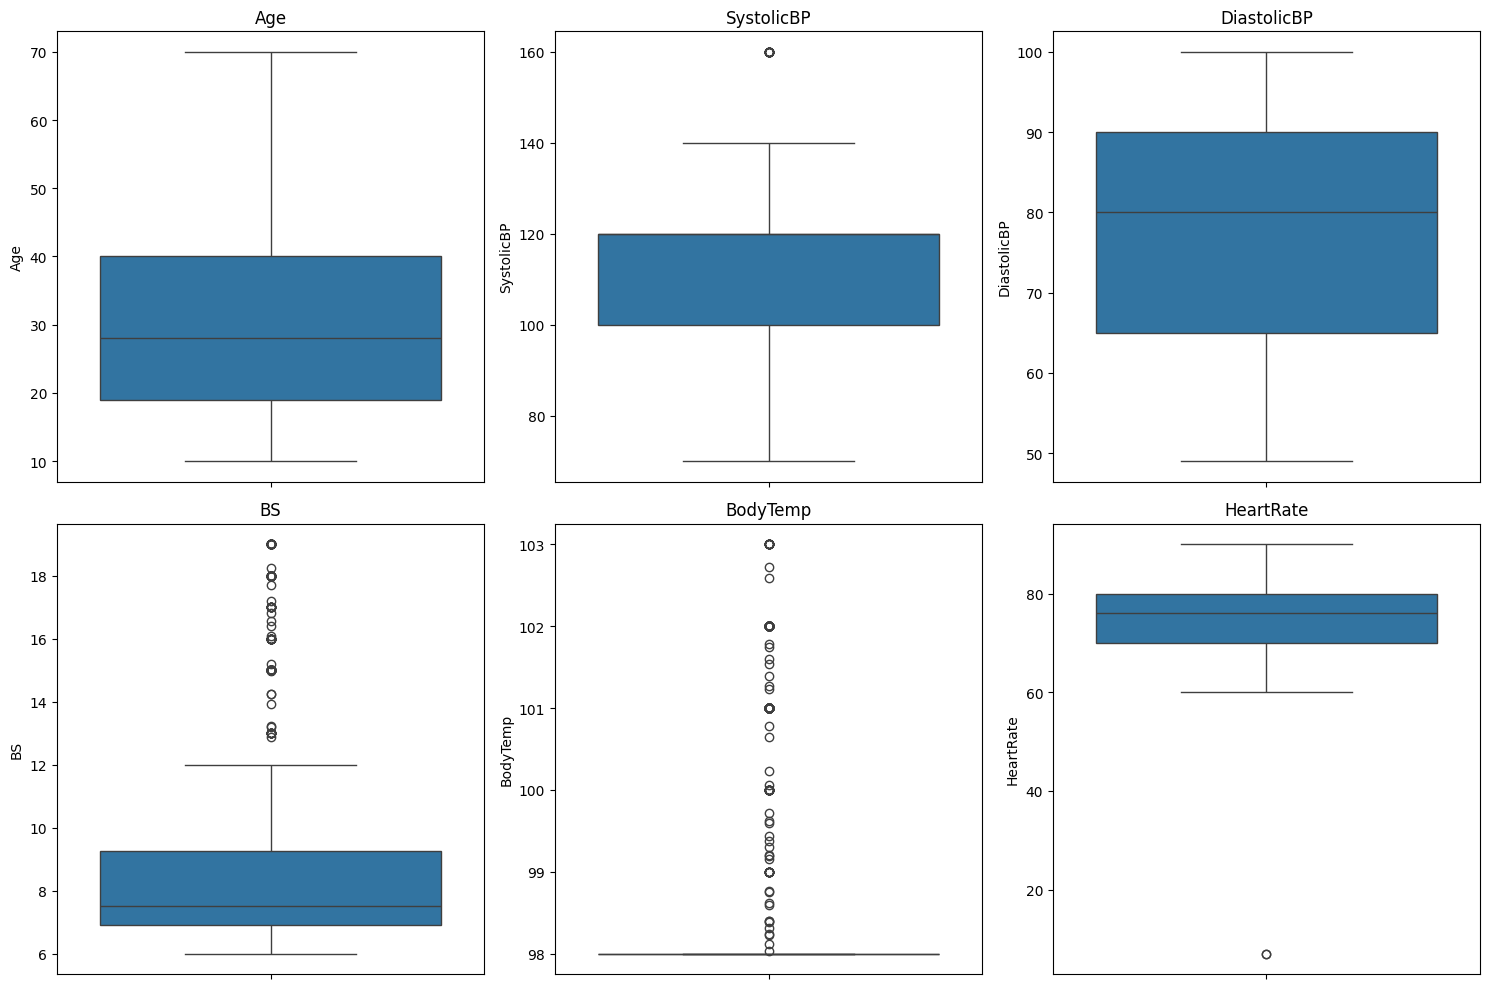

In [ ]:
# Plot the initial box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

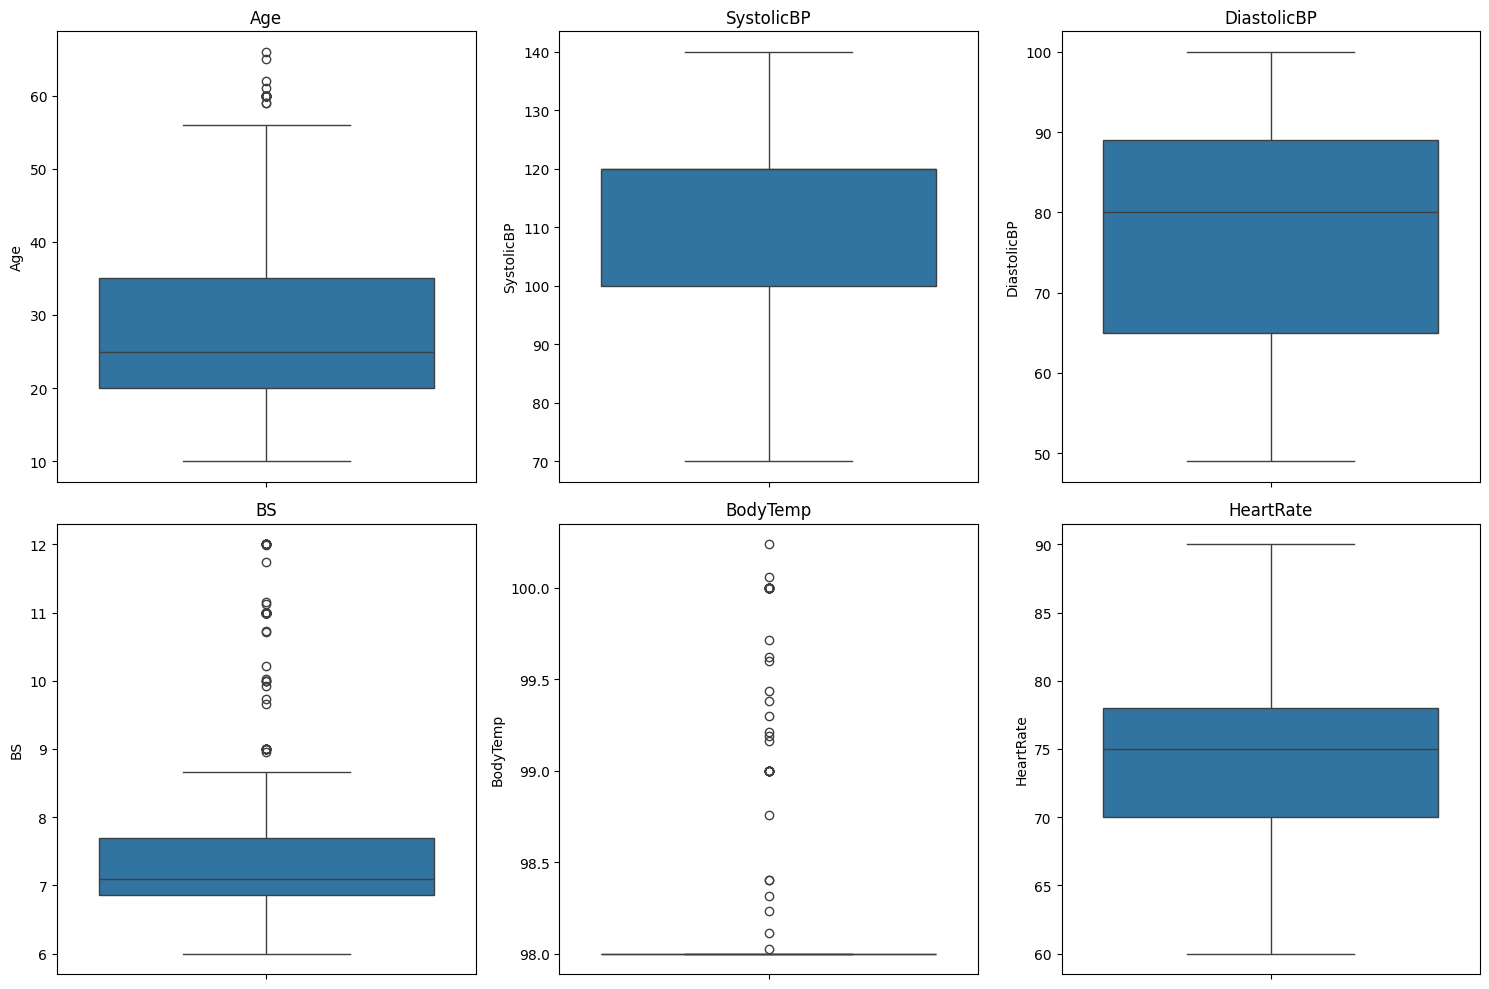

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each column
df_no_outliers = df.copy()
for column in df.columns[:-1]:
    df_no_outliers = remove_outliers(df_no_outliers, column)

# Plot the box plots again after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_no_outliers.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(column)
plt.tight_layout()
plt.show()

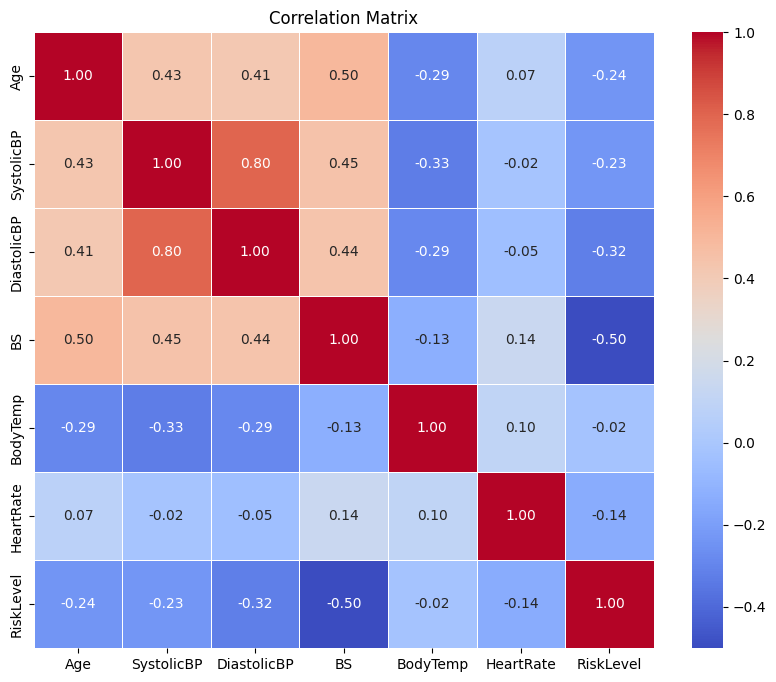

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Random Forest**

Accuracy: 0.8565573770491803
Precision: 0.8612761809891025
Recall: 0.8565573770491803
F1 Score: 0.8579504862964055
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.83      0.79      0.81        87
           2       0.77      0.85      0.81        84

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.86      0.86      0.86       244

Confusion Matrix:
[[69  1  3]
 [ 0 69 18]
 [ 0 13 71]]


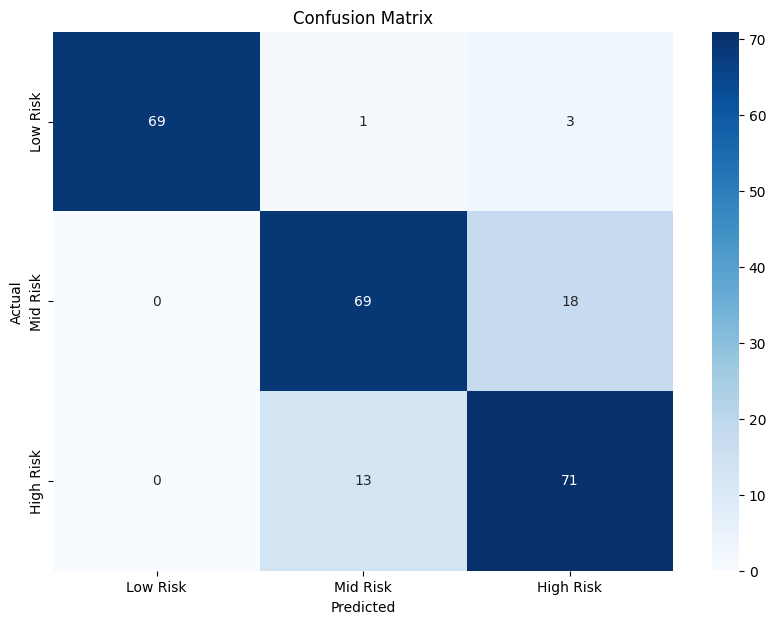

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Features and target
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_score_rf = f1_score(y_test, y_pred, average='weighted')
classification_report_rf = classification_report(y_test, y_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(confusion_matrix_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **XGBOOST**

Accuracy: 0.8647540983606558
Precision: 0.8678961748633879
Recall: 0.8647540983606558
F1 Score: 0.8657718269750044
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.83      0.80      0.82        87
           2       0.79      0.85      0.82        84

    accuracy                           0.86       244
   macro avg       0.87      0.87      0.87       244
weighted avg       0.87      0.86      0.87       244

Confusion Matrix:
[[70  1  2]
 [ 0 70 17]
 [ 0 13 71]]


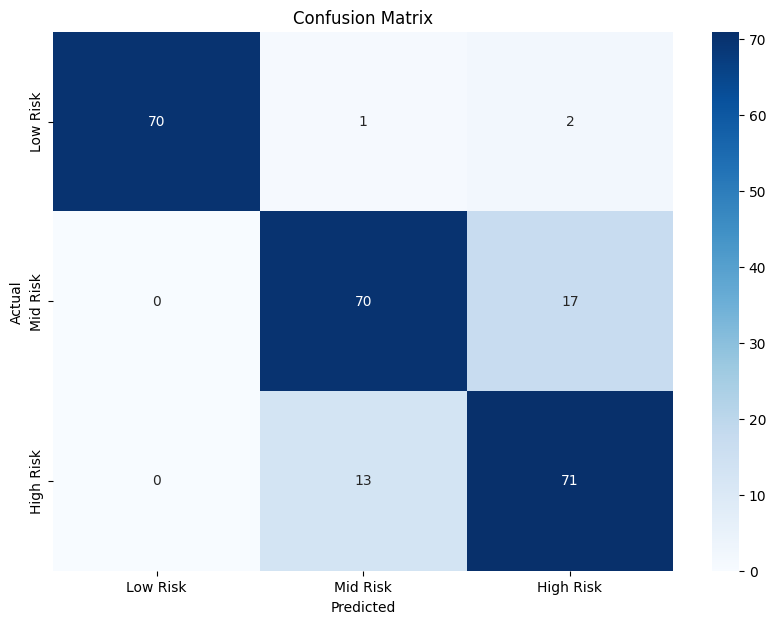

In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost classifier
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_score_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Output the results
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_score_xgb}")
print("Classification Report:")
print(classification_report_xgb)
print("Confusion Matrix:")
print(confusion_matrix_xgb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **KNN**

Accuracy: 0.7745901639344263
Precision: 0.7821106043050179
Recall: 0.7745901639344263
F1 Score: 0.7766816406556944
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        73
           1       0.74      0.70      0.72        87
           2       0.68      0.77      0.73        84

    accuracy                           0.77       244
   macro avg       0.79      0.78      0.78       244
weighted avg       0.78      0.77      0.78       244

Confusion Matrix:
[[63  3  7]
 [ 3 61 23]
 [ 1 18 65]]


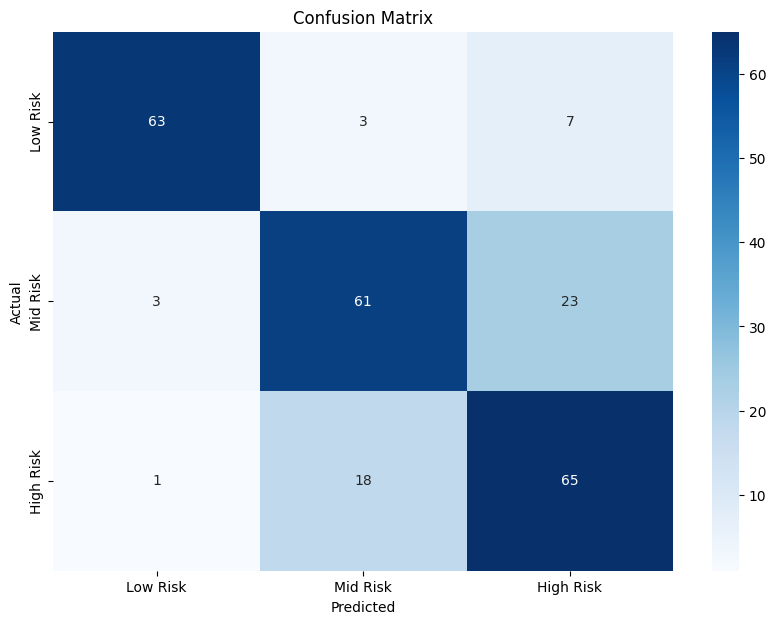

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Output the results
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_score_knn}")
print("Classification Report:")
print(classification_report_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **GBM**

Accuracy: 0.7909836065573771
Precision: 0.8054644808743169
Recall: 0.7909836065573771
F1 Score: 0.7944936110768726
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        73
           1       0.75      0.76      0.75        87
           2       0.71      0.81      0.76        84

    accuracy                           0.79       244
   macro avg       0.81      0.79      0.80       244
weighted avg       0.81      0.79      0.79       244

Confusion Matrix:
[[59  6  8]
 [ 1 66 20]
 [ 0 16 68]]


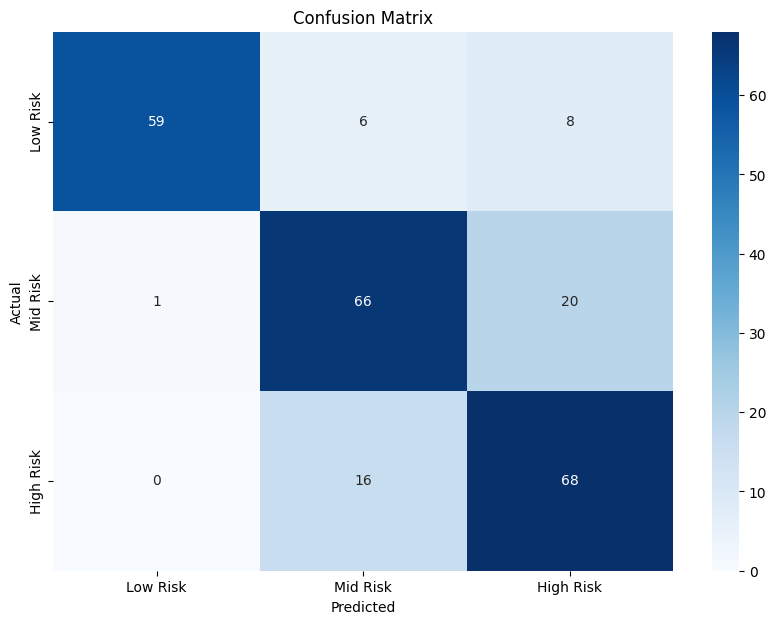

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a GBM classifier
model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = model_gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_score_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
classification_report_gbm = classification_report(y_test, y_pred_gbm)
confusion_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Output the results
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1 Score: {f1_score_gbm}")
print("Classification Report:")
print(classification_report_gbm)
print("Confusion Matrix:")
print(confusion_matrix_gbm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


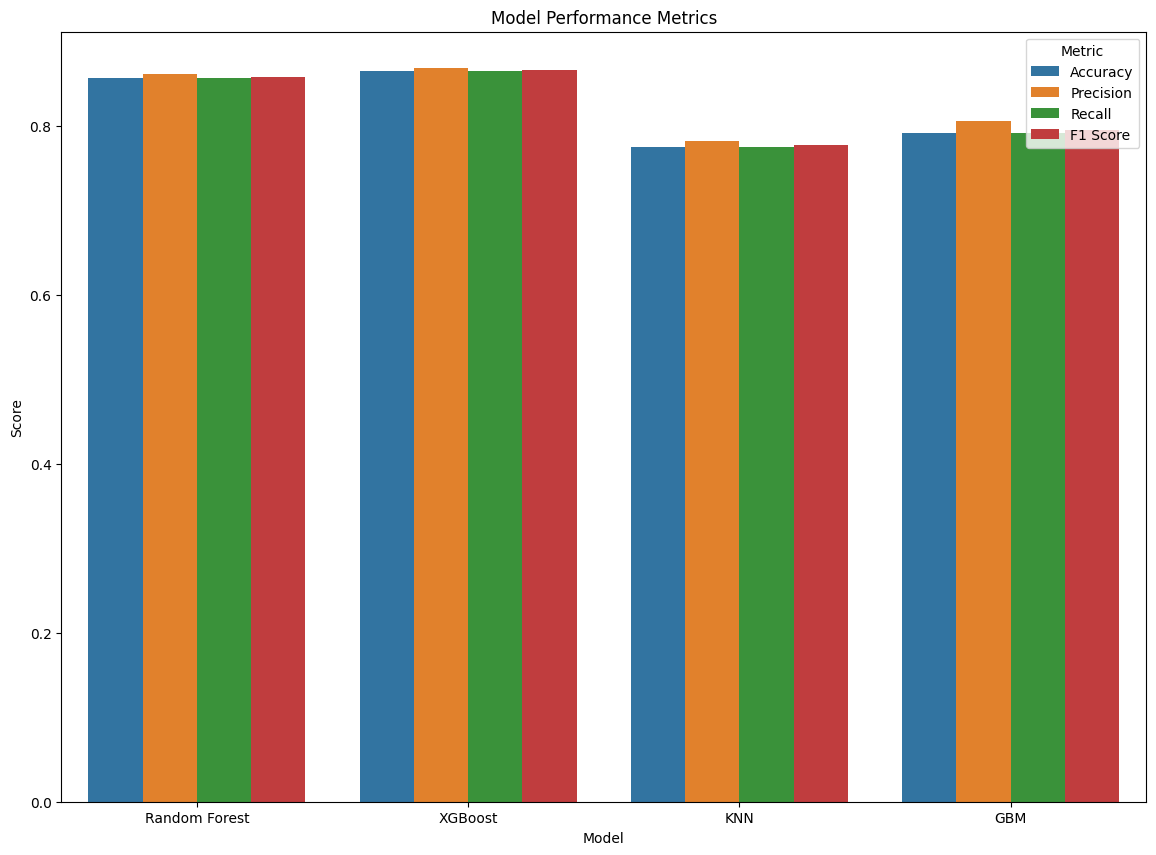

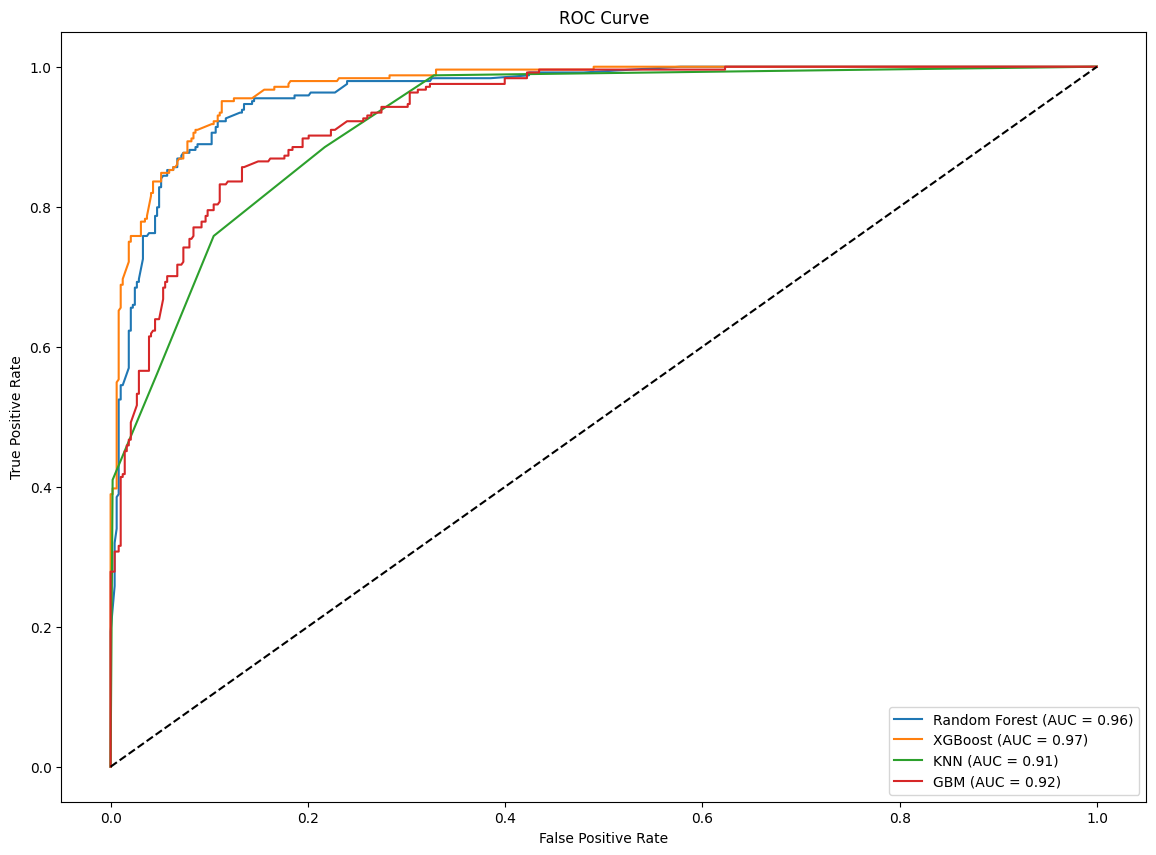

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(),
    'GBM': GradientBoostingClassifier(random_state=42)
}

# Prepare data for ROC curve
roc_data = {'Model': [], 'FPR': [], 'TPR': [], 'ROC AUC': []}

# Metrics storage
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if len(model.classes_) == 2 else model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC curve data
    if len(model.classes_) == 2:  # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
    else:  # Multi-class classification
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test).ravel())
        roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test), average='weighted', multi_class='ovr')

    # Store metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    roc_data['Model'].append(name)
    roc_data['FPR'].append(fpr)
    roc_data['TPR'].append(tpr)
    roc_data['ROC AUC'].append(roc_auc)

# Convert metrics and ROC data to DataFrames
metrics_df = pd.DataFrame(metrics)
roc_df = pd.DataFrame(roc_data)

# Plot Count Plots for Accuracy, Precision, Recall, and F1 Score
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 10))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

# Plot ROC Curves
plt.figure(figsize=(14, 10))
for idx, row in roc_df.iterrows():
    plt.plot(row['FPR'], row['TPR'], label=f"{row['Model']} (AUC = {row['ROC AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import joblib
# Assuming model_xgb is your trained model
joblib.dump(model_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
# Load the trained XGBoost model
model_xgb = joblib.load('xgb_model.pkl')

# Function to make predictions
def predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'SystolicBP': [systolic_bp],
        'DiastolicBP': [diastolic_bp],
        'BS': [bs],
        'BodyTemp': [body_temp],
        'HeartRate': [heart_rate]
    })

    # Predict using the loaded model
    prediction = model_xgb.predict(input_data)

    # Map prediction to risk level
    risk_levels = ['low Maternal risk', 'Medium Maternal risk', 'High Maternal risk']
    return risk_levels[prediction[0]]

# Interactive input cells
age = int(input('Enter Age: '))
systolic_bp = int(input('Enter Systolic BP: '))
diastolic_bp = int(input('Enter Diastolic BP: '))
bs = float(input('Enter Blood Sugar: '))
body_temp = float(input('Enter Body Temperature (Fahrenheit): '))
heart_rate = int(input('Enter Heart Rate: '))

# Predict risk level
risk_level = predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate)
print(f'Predicted Risk Level: {risk_level}')


Enter Age: 67
Enter Systolic BP: 160
Enter Diastolic BP: 90
Enter Blood Sugar: 15
Enter Body Temperature (Fahrenheit): 99
Enter Heart Rate: 89
Predicted Risk Level: low Maternal risk


In [ ]:
import pandas as pd
import joblib

# Load the trained XGBoost model
model_xgb = joblib.load('xgb_model.pkl')

def predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'SystolicBP': [systolic_bp],
        'DiastolicBP': [diastolic_bp],
        'BS': [bs],
        'BodyTemp': [body_temp],
        'HeartRate': [heart_rate]
    })

    # Predict using the loaded model
    prediction = model_xgb.predict(input_data)

    # Map prediction to risk level
    if prediction[0] == 0:
        risk_level = 'Low Maternal risk'
    elif prediction[0] == 1:
        risk_level = 'Medium Maternal risk'
    elif prediction[0] == 2:
        risk_level = 'High Maternal risk'

    return risk_level

# Test with example values
print(predict_risk_level(30, 120, 80, 7.0, 98.6, 80))
print(predict_risk_level(50, 140, 90, 22.0, 100.0, 70))


Low Maternal risk
Low Maternal risk
